<a href="https://colab.research.google.com/github/33siwon/AI-networking/blob/main/AI_communication_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20182197 전시원


In [1]:
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)
filename='/content/gdrive/MyDrive/example/classification_data.csv'
df = pd.read_csv(filename)   
df

In [26]:
data_total = df.values   # df.values 를 통해서 2D (17 X 3) tensor(행렬) 생성.



num_of_inputs = 2 # 

data = data_total[:,:num_of_inputs] # 행은 모두 선택, 열은 2개만 선택
label = data_total[:,num_of_inputs].reshape(-1,1) 
data
# data is input 
# label is output

df



,X1,X2,Y
0,8,-11,1
1,7,7,-1
2,12,-20,1
3,14,-3,-1
4,12,8,-1
5,1,-12,1
6,15,5,-1
7,7,-10,1
8,10,4,-1
9,6,2,1


In [28]:
def sign(data,W):
  sum = data[0]*W[0] +data[1]*W[1]+ W[2]
  return 1 if sum >= 0 else -1
#Hypothesis 
W = np.random.rand(num_of_inputs+1).reshape(-1,1) 
print(W)

[[0.6976312 ]
 [0.06022547]
 [0.66676672]]


In [6]:
def PLA_train(data):
    W = np.random.rand(num_of_inputs+1).reshape(-1,1) 
    # 랜덤으로 초기값 W 를 정의.
    while True:
        isFinal = True
        for i in range(len(data)):
            predicted = sign(data[i], W)
            if label[i] * predicted <= 0:
                isFinal = False
                W[0] = W[0] + label[i]*data[i,0] # 파라미터 업데이트
                W[1] = W[1] + label[i]*data[i,1]
                W[2] = W[2] + label[i]*1
        if isFinal == True:
                return W
# PLA Algorithm


In [29]:
W = PLA_train(data)
print(f" range(len) {range(len(data))}")
print(f" data : {data[0,0]}")
print(W)

 range(len) range(0, 17)
 data : 8
[[-4.32936213]
 [-1.78961744]
 [35.1289263 ]]


In [9]:
data_red = np.empty([1,2])
data_blue = np.empty([1,2])

for i in range(len(data_total)):
    if label[i] ==1:
        data_red = np.vstack((data_red, data[i]))
    else:
        data_blue = np.vstack((data_blue, data[i]))

data_red = data_red[1:len(data_red)]
data_blue = data_blue[1:len(data_blue)]

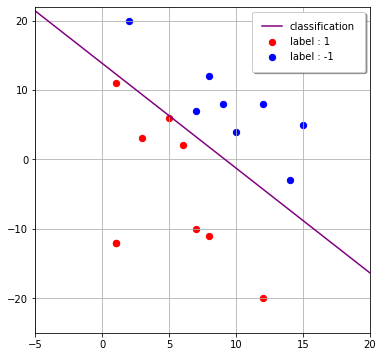

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
x= np.arange(-50,50)
ax.plot(x,(-(W[2] / W[1]) / (W[2] / W[0]))*x + (-W[2] / W[1]), label='classification', c='purple')
ax.scatter(data_red[:,0],data_red[:,1], c ='red', s=40, label = 'label : 1')
ax.scatter(data_blue[:,0],data_blue[:,1], c ='blue', s=40, label = 'label : -1')
legend = ax.legend(loc='best',fontsize=10,frameon=1,shadow=True, borderpad=1)
ax.set_ylim(-25,22)
ax.set_xlim(-5,20)
ax.grid()